# Converting depth images to point clouds using open3d
This notebook is the visual equivalent of the script `scripts/example.py`. 
Check the readme for more details.

In [1]:
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

from pointcloud_tools import PointCloudCreator, create_pcd_from_array, read_pcd, write_pcd

In [2]:
# point to the data dir
current_folder = Path(".").resolve()
base_dir = current_folder.parent / "data"

## Demo images
A single example of a tomato depth image is included. 

In [3]:
# point to the image files
image = "A_1a111b40"

rgb_file = base_dir / "rgb" / f"{image}.png"
depth_file = base_dir / "depth" / f"{image}_depth.png"

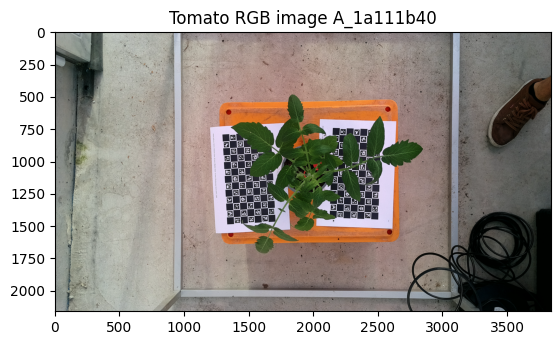

In [4]:
rgb_img = cv2.cvtColor(cv2.imread(str(rgb_file)), cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.title(f"Tomato RGB image {image}")
plt.show()

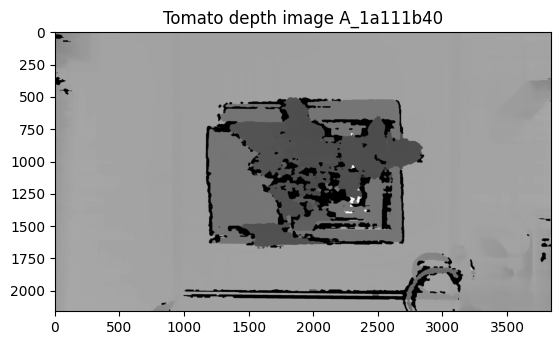

In [5]:
# The depth image is provided by the camera, and is a reconstruction from stero infra-red imaging.
depth_img = cv2.imread(str(depth_file), cv2.IMREAD_UNCHANGED)
plt.imshow(depth_img, cmap='gray')
plt.title(f"Tomato depth image {image}")
plt.show()

# Now we create a point cloud object

In [6]:
# init a point cloud creator with the camera configuration
point_cloud_creator = PointCloudCreator(conf_file=base_dir / "oak-d-s2-poe_conf.json", logger_level=100)

# create pcd object
pcd_object = point_cloud_creator.convert_depth_to_pcd(rgb_file=rgb_file, depth_file=depth_file)

## Quick visualization to validate the output.
More advanced visualization tools from open3d are available: 

https://www.open3d.org/docs/latest/tutorial/Basic/jupyter.html

Or use one of the many point cloud viewers.

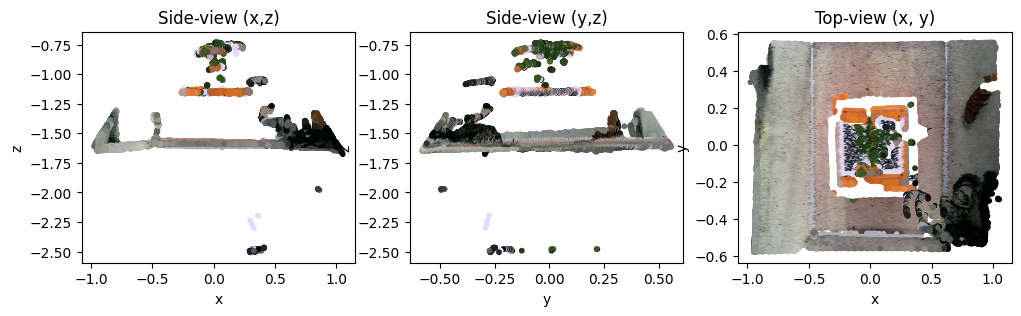

In [7]:
# Extract points and colors
points = np.asarray(pcd_object.points)
colors = np.asarray(pcd_object.colors)

# downsample to make the plotting faster

# use -y because the pixel coordinates differs from the matrix coordinate system
# use -z because the camera is facing downwards
x = points[range(0, len(points), 100), 0]
y = -points[range(0, len(points), 100), 1]
z = -points[range(0, len(points), 100), 2]
c = colors[range(0, len(points), 100), :]

fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x, z, c=c, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y, z, c=c, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x, y, c=c, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()